In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
patients_df = pd.read_csv('../../../pd_speech_features.csv', skiprows=[0])

In [7]:
patients_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [8]:
patients_df.columns[1:40]

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter', 'locShimmer',
       'locDbShimmer', 'apq3Shimmer', 'apq5Shimmer', 'apq11Shimmer',
       'ddaShimmer', 'meanAutoCorrHarmonicity', 'meanNoiseToHarmHarmonicity',
       'meanHarmToNoiseHarmonicity', 'minIntensity', 'maxIntensity',
       'meanIntensity', 'f1', 'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4',
       'GQ_prc5_95', 'GQ_std_cycle_open', 'GQ_std_cycle_closed', 'GNE_mean',
       'GNE_std', 'GNE_SNR_TKEO'],
      dtype='object')

In [9]:
patients_df.shape

(756, 755)

In [10]:
patients_df['class'].unique()

array([1, 0], dtype=int64)

The target variable is binary, it takes 0 or 1. Look at the balance of class distribution.

In [11]:
patients_df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

In [12]:
patients_df.isna().values.any()

False

Review statistical summary of data

In [13]:
patients_df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [14]:
patients_df = patients_df.drop(['id','meanPeriodPulses', 'stdDevPeriodPulses'], axis=1)

In [15]:
X = patients_df.drop('class', axis=1)

In [16]:
y = patients_df['class']

Perform Kolmogorov-Smirnov test to see each feature variable comes from normal distribution or not. Thus, we can detect what features are needed to be scaled. Null hypothesis is the feature has a normal distribution. If p-value of a feature is smaller than 0.05, we can reject the null hypothesis. Which means that it doesn't have normal distribution. We aim to find these features with not normally distributed.

In [38]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test

test = X.apply(lambda col : kstest(col, 'norm'), axis=0)
test

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,5.000000e-01,1.980902e-01,1.065604e-01,1.025813e-01,1.146277e-01,1.146277e-01,2.347787e-01,2.569345e-01,3.121761e-01,2.699153e-01,...,4.374163e-01,4.389847e-01,4.169572e-01,4.044754e-01,3.903222e-01,3.761955e-01,3.713572e-01,3.954612e-01,3.880927e-01,4.424753e-01
1,2.714088e-175,1.795972e-26,6.265688e-08,2.223887e-07,4.138028e-09,4.138028e-09,3.895399e-37,1.697208e-44,5.903888e-66,3.886395e-49,...,3.935747e-132,3.987940e-133,1.486221e-119,3.108469e-112,2.999333e-104,1.310576e-96,4.567928e-94,4.133489e-107,5.064604e-103,2.356377e-135


Gender is a binary variable, so leave it as it is.

In [46]:
col_names_to_scale = test[(test.iloc[1] < 0.05).index.to_list()].columns
col_names_to_scale.delete(0) # Remove gender

Index(['PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses', 'locPctJitter',
       'locAbsJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
       ...
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=750)

Scale feature variable with non-normal distribution. Keep other variables as it is.

In [47]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X[col_names_to_scale])
X[col_names_to_scale] = transformer.transform(X[col_names_to_scale])

In [48]:
X[col_names_to_scale].describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,-0.484127,-0.886522,-0.001029,0.023516,0.052324,0.050121,0.535114,0.551390,0.649986,0.576733,...,1.740260,0.777831,0.598133,0.672997,0.900165,0.997402,0.840093,0.442237,0.395508,0.364552
std,0.500079,2.368322,0.645941,0.687290,0.744608,0.745985,1.695485,1.752877,1.961424,1.899963,...,4.238136,1.590269,1.236879,1.373778,1.982684,2.240000,1.798366,0.861218,0.769599,0.598689
min,-1.000000,-10.745343,-1.454844,-1.650461,-2.363977,-2.363977,-0.829032,-0.676923,-0.520000,-0.679887,...,-0.167943,-0.153544,-0.209684,-0.241780,-0.299059,-0.316275,-0.342552,-0.266431,-0.286786,-0.144696
25%,-1.000000,-0.655020,-0.495425,-0.489143,-0.495310,-0.495310,-0.338710,-0.326827,-0.260000,-0.317280,...,-0.122170,-0.119687,-0.136854,-0.146460,-0.167488,-0.171735,-0.179056,-0.167603,-0.191585,-0.116980
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.344980,0.504575,0.510857,0.504690,0.504690,0.661290,0.673173,0.740000,0.682720,...,0.877830,0.880313,0.863146,0.853540,0.832512,0.828265,0.820944,0.832397,0.808415,0.883020
max,0.000000,1.371035,1.409353,1.934593,4.427767,4.420263,16.938710,18.901646,21.540000,20.022663,...,34.167405,8.821386,7.439843,6.211421,9.637077,10.236802,7.570279,3.028112,2.677312,2.549758


This dataset is very highly dimensional. So we need to reduce this dimesionality. I applied t-SNE method two create two clusters. However, as we see from the figure, it is not sucessful to separate two classes. 

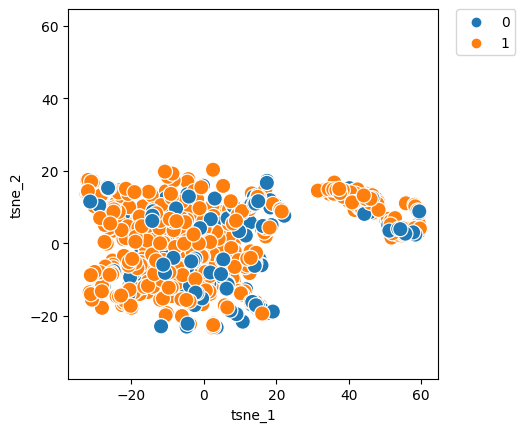

In [50]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)


# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)


We clearly need more components to separate two classes effectively. But we don't know how many components will be sufficient. In order to  define it, we should compare inter cluster purity and intra cluster separation quality resulted from t-SNE reduction with different component numbers. Since this task is more complex, I switched another dimensionality reduction method, principal component analysis.

To measure the performance of Principal Component Analysis (PCA), there are several evaluation metrics and approaches you can use. PCA aims to retain the most important variance in the data by projecting it onto a lower-dimensional space. The "explained variance" measures how much of the original data's variance is retained in each principal component. We can plot the cumulative explained variance as a function of the number of principal components to determine how many components are needed to retain a certain percentage of the total variance.

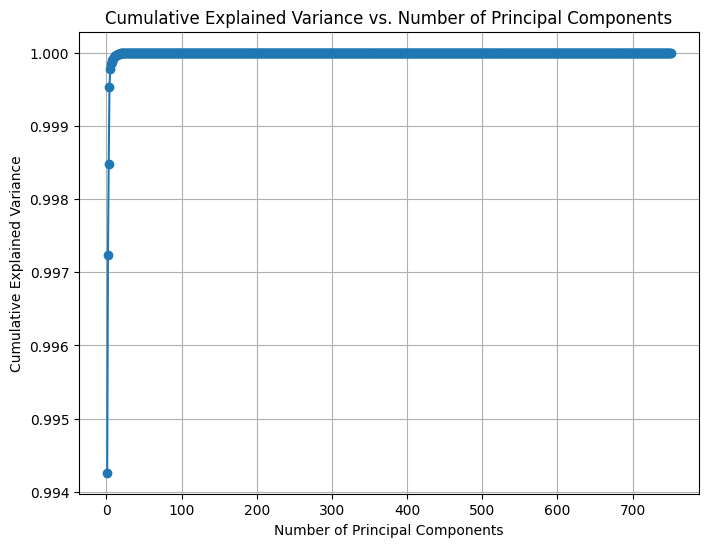

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Perform PCA with the number of features in the dataset
n_components = X.shape[1]
pca = PCA(n_components=n_components)
pca.fit(X)

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


When we observe the graph, we see that we can cover the 100% variance of the whole dataset by reducing principal components to is roughly 100. Then let's apply n_components=100.

In [67]:
pca = PCA(n_components=100)
X_reduced = pca.fit_transform(X)

In [68]:
X_reduced

array([[-1.72911045e+04, -1.95786338e+02, -1.80034639e+02, ...,
         1.97973761e+00,  7.00018716e+00, -7.61807491e-01],
       [-1.72911119e+04, -1.95922690e+02, -1.78678594e+02, ...,
        -9.82616983e+00,  2.38849783e+01, -1.01053945e+01],
       [-1.72910315e+04, -1.95852275e+02, -1.80061483e+02, ...,
         2.45480939e+00, -2.12922590e+00, -2.27567036e-01],
       ...,
       [-1.72915801e+04, -1.95653840e+02, -1.79966677e+02, ...,
        -5.49514414e+00, -2.40912529e+00, -4.01118535e+00],
       [-1.72914510e+04, -1.95702639e+02, -1.79863224e+02, ...,
         2.90201779e+00,  2.04736887e+00,  3.51364950e+00],
       [-1.72911668e+04, -1.95826435e+02, -1.80059682e+02, ...,
         3.01727778e+00,  3.79976381e+00,  1.67894831e+00]])

After reducing the number of feature variables, we can train the data with SVM model. We have binary class variable, that's why SVM is selected to classify.

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 0)

PCA is a linear dimensionality reduction technique, meaning it excels at capturing linear relationships between variables. So, SVM kernel is set to linear. Also, SVM tends to perform well on small to medium-sized datasets. It can handle datasets with a moderate number of samples and features efficiently.

In [76]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [77]:
y_pred_test = clf.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
print('Accuracy of SVM is ',accuracy_score(y_test, y_pred_test))

Accuracy of SVM is  0.8092105263157895
